In [34]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

In [2]:
with open('data/day8_input.txt') as f:
    lines = f.readlines()

In [3]:
lines = [[*line] for line in lines]

In [4]:
data_list = []
x = 0
y = 0
while x < len(lines):
    for line in lines[x]:
        for num in line:
            if line == '\n':
                continue
            data_list.append({'val':line, 'xcoord':x, 'ycoord':y})
            y += 1    
    x += 1
    y=0

In [5]:
df = pd.DataFrame(data_list)

In [6]:
geometry = [Point(xy) for xy in zip(df.xcoord, df.ycoord)]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

In [201]:
gdf.head()

,val,xcoord,ycoord,geometry
0,3,0,0,POINT (0.00000 0.00000)
1,1,0,1,POINT (0.00000 1.00000)
2,3,0,2,POINT (0.00000 2.00000)
3,2,0,3,POINT (0.00000 3.00000)
4,1,0,4,POINT (0.00000 4.00000)


<AxesSubplot:>

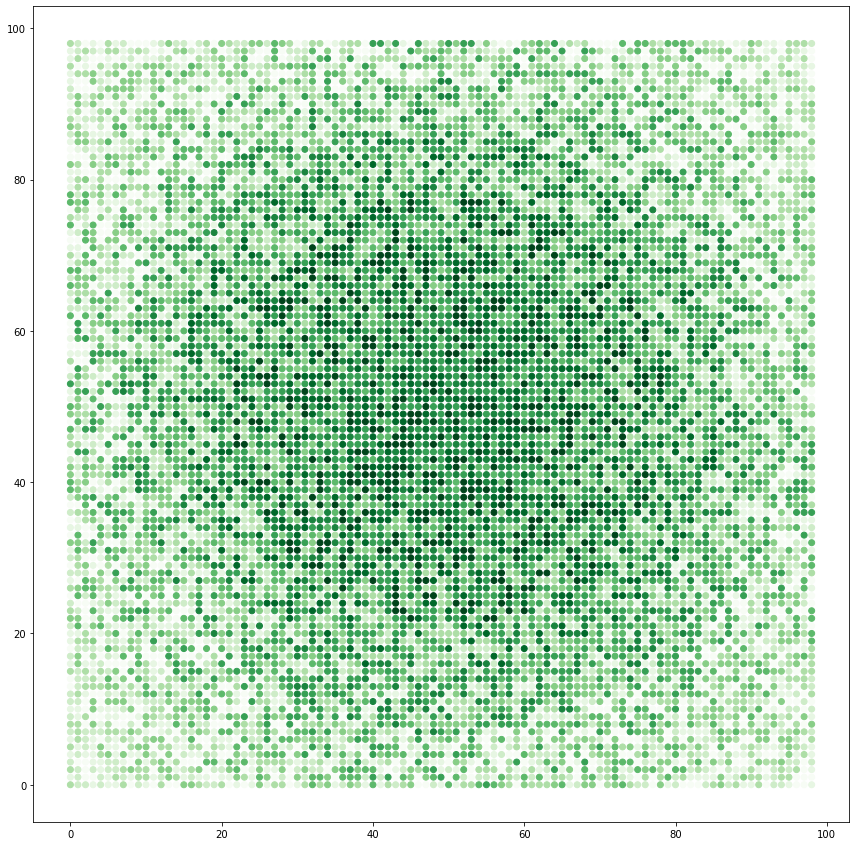

In [7]:
gdf.plot('val', cmap = 'Greens', figsize=(15,15))

In [71]:
wherec = ((df['xcoord']==min(df['xcoord'])) | 
         (df['xcoord']== max(df['xcoord'])) |
         (df['ycoord']==min(df['ycoord'])) |
         (df['ycoord']==max(df['ycoord'])))

In [72]:
df['visible'] = np.where(wherec, True, False)

<AxesSubplot:>

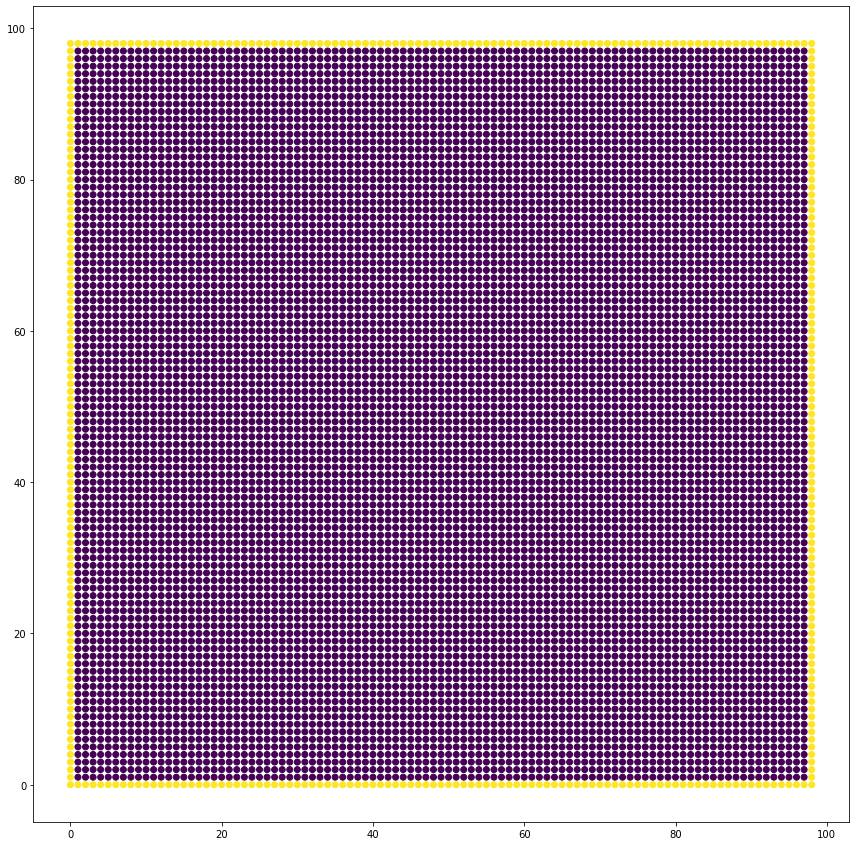

In [77]:
gdf.plot('visible', figsize=(15,15))

In [20]:
comp = df.loc[0].compare(df.loc[1])

In [32]:
comp

,self,other
val,3,1
ycoord,0,1
geometry,POINT (0 0),POINT (0 1)


In [30]:
visible = False
if int(comp['self']['val']) - int(comp['other']['val']):
    visible = True